# LearnLissajous course evaluation

The objective here is to generate insights based on the resulting data from the course application to a group of heterogenous students

In [17]:
# just reading the files
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
directoryPath = "./LearnLissajous/"
results = {}
for file_name in glob.glob(directoryPath+'*.csv'):
    x = pd.read_csv(file_name, low_memory=False)
    username = file_name.split("/")[-1][:-4]
    results[username] =  x

### Result for a certain student

In [18]:
pd.DataFrame(results.keys(), columns=["student"]).sort_values("student").reset_index()

,index,student
0,26,bo
1,13,daniel-saravali
2,16,davibai1006
3,28,estknowledge
4,8,felipehu
5,17,fishboy1900
6,29,frederico_schiffner
7,22,gui-lodi
8,0,guipolezel
9,5,h-lefundes


In [19]:
results["joaogrudka"]

,Title,Type,Start time,End time,Graduation,Status
0,Vamos nos conhecer um pouco,Lesson,2021-08-27 02:26:53,2021-08-27 02:26:53,NaN,Completed
1,Introdução,Lesson,2021-08-27 02:31:37,2021-08-27 02:31:37,NaN,Completed
2,Avaliação de conhecimentos prévios,Quiz,2021-08-27 02:31:48,2021-08-27 02:37:25,Passed,Completed
3,Avaliação de conhecimentos prévios (Parte 2),Quiz,2021-08-27 02:37:37,2021-08-27 02:40:36,Passed,Completed
4,Construção geométrica: Curvas e Lugar geométrico,Lesson,2021-08-27 02:45:48,2021-08-27 02:45:48,NaN,Completed
5,Mecanismos que descrevem movimentos harmônicos,Lesson,2021-09-09 18:50:03,2021-09-09 18:50:03,NaN,Completed
6,Projeto de Mecanismo para desenhar padrões de ...,Lesson,2021-09-09 18:51:33,2021-09-09 18:51:33,NaN,Completed
7,Avaliação Final (Parte 1),Quiz,2021-09-09 18:51:44,2021-09-09 19:07:42,Failed,Completed
8,Avaliação Final (Parte 2),Quiz,2021-09-09 19:10:56,2021-09-09 20:04:50,Failed,Completed
9,Avaliação Final (Parte 3),Quiz,2021-09-09 20:45:59,2021-09-09 20:51:21,Passed,Completed


---

## Absolute analysis for av pair 12 and av pair 34

In [20]:
full_df = pd.DataFrame()

for student in list(results.keys()):

    df = results[student][results[student]["Type"] == "Quiz"].copy()
    df["student"] = student
    df = df.set_index("Title")
    df = df.drop("Avaliação de conhecimentos prévios", errors="ignore")
    df = df.drop("Avaliação de conhecimentos prévios (Parte 2)", errors="ignore")
    df = df.reset_index()

    for av_pair_name, av_pair in {
        "quadrant_av12": ("Avaliação Final (Parte 1)", "Avaliação Final (Parte 2)"),
        "quadrant_av34": ("Avaliação Final (Parte 3)", "Avaliação Final (Parte 4)"),
    }.items():
        av1, av2 = av_pair

        value_av1 = None
        if len(df[df["Title"] == av1]["Graduation"].tolist()) > 0:
            value_av1 = df[df["Title"] == av1]["Graduation"].tolist()[0]

        value_av2 = None
        if len(df[df["Title"] == av2]["Graduation"].tolist()) > 0:
            value_av2 = df[df["Title"] == av2]["Graduation"].tolist()[0]

        if value_av1 == "Passed" and value_av2 == "Passed":
            df[av_pair_name] = "TT"
        elif value_av1 == "Failed" and value_av2 == "Passed":
            df[av_pair_name] = "FT"
        elif value_av1 == "Passed" and value_av2 == "Failed":
            df[av_pair_name] = "TF"
        elif value_av1 == "Failed" and value_av2 == "Failed":
            df[av_pair_name] = "FF"
        
    full_df = pd.concat([full_df, df])

full_df

q3_q4_q5_q6_df = full_df

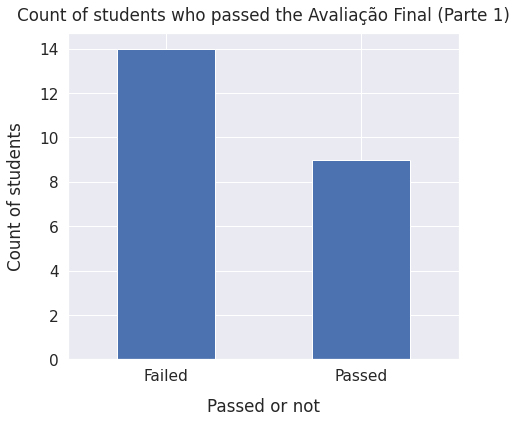

In [21]:
sns.set(font_scale=1.4)
full_df[full_df["Title"] == "Avaliação Final (Parte 1)"]["Graduation"].value_counts().plot(kind='bar', figsize=(7, 6), rot=0, stacked=True)
plt.xlabel("Passed or not", labelpad=14)
plt.ylabel("Count of students", labelpad=14)
plt.title("Count of students who passed the Avaliação Final (Parte 1)", y=1.02);

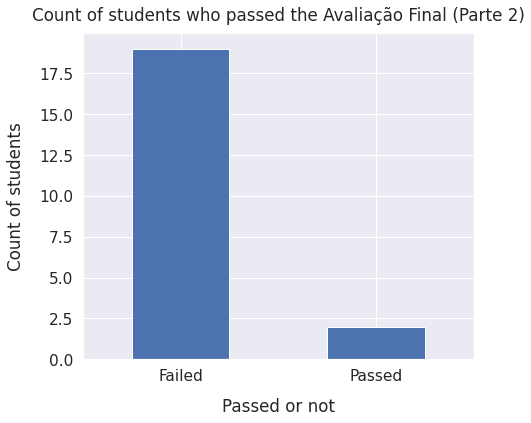

In [22]:
sns.set(font_scale=1.4)
full_df[full_df["Title"] == "Avaliação Final (Parte 2)"]["Graduation"].value_counts().plot(kind='bar', figsize=(7, 6), rot=0, stacked=True)
plt.xlabel("Passed or not", labelpad=14)
plt.ylabel("Count of students", labelpad=14)
plt.title("Count of students who passed the Avaliação Final (Parte 2)", y=1.02);

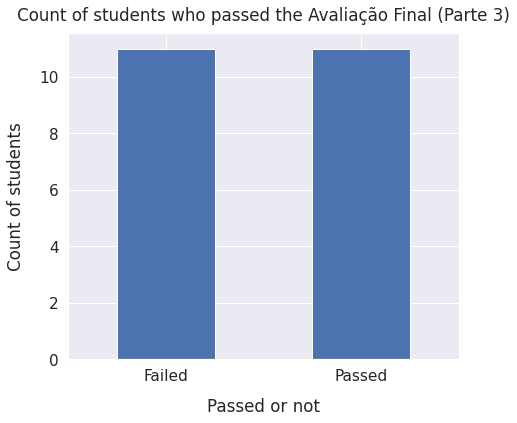

In [23]:
sns.set(font_scale=1.4)
full_df[full_df["Title"] == "Avaliação Final (Parte 3)"]["Graduation"].value_counts().plot(kind='bar', figsize=(7, 6), rot=0, stacked=True)
plt.xlabel("Passed or not", labelpad=14)
plt.ylabel("Count of students", labelpad=14)
plt.title("Count of students who passed the Avaliação Final (Parte 3)", y=1.02);

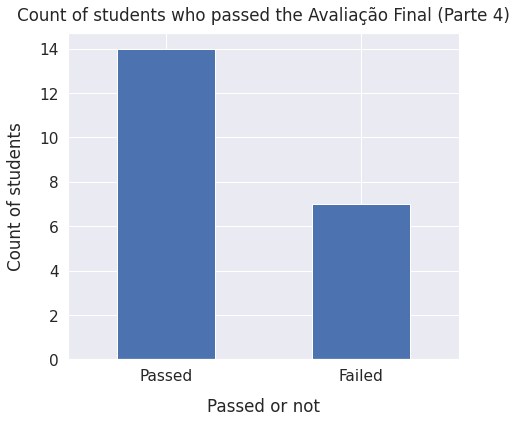

In [24]:
sns.set(font_scale=1.4)
full_df[full_df["Title"] == "Avaliação Final (Parte 4)"]["Graduation"].value_counts().plot(kind='bar', figsize=(7, 6), rot=0, stacked=True)
plt.xlabel("Passed or not", labelpad=14)
plt.ylabel("Count of students", labelpad=14)
plt.title("Count of students who passed the Avaliação Final (Parte 4)", y=1.02);

## Quadrants

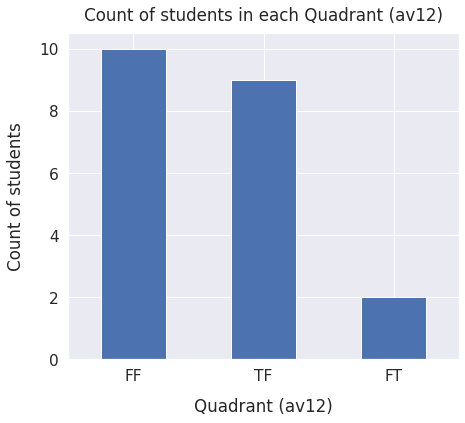

In [25]:
full_df[['student', 'quadrant_av12']].drop_duplicates().reset_index().drop('index', axis=1)['quadrant_av12'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0, stacked=True)
plt.xlabel("Quadrant (av12)", labelpad=14)
plt.ylabel("Count of students", labelpad=14)
plt.title("Count of students in each Quadrant (av12)", y=1.02);

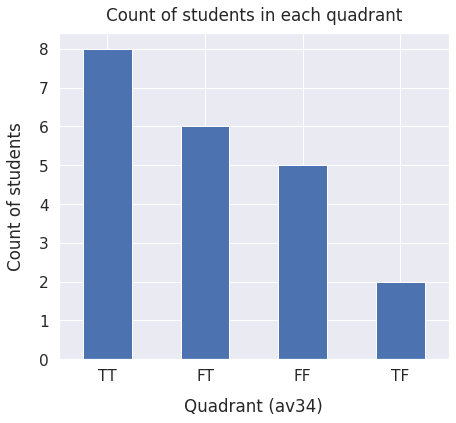

In [26]:
full_df[['student', 'quadrant_av34']].drop_duplicates().reset_index().drop('index', axis=1)['quadrant_av34'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0, stacked=True)
plt.xlabel("Quadrant (av34)", labelpad=14)
plt.ylabel("Count of students", labelpad=14)
plt.title("Count of students in each quadrant", y=1.02);

---

### Introductory questions separated analysis

Since the 2 introductory questions were meant to measure the previous knowledge, before taking the course, they did not have a minimum value to pass.

Thus we everybody passed.

Now we need to observe how each student performed in the detailed result, not general.

In [27]:
# just reading the files
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
directoryPath = "./LearnLissajousIntro/"
results_question1 = {}
results_question2 = {}
for file_name in glob.glob(directoryPath+'*.csv'):
    x = pd.read_csv(file_name, low_memory=False)
    a = file_name.split("/")[-1][:-4].split("_")
    username = a[0]
    introductory_question_number = a[1][-1]
    if introductory_question_number == "1":
        results_question1[username] =  x
    if introductory_question_number == "2":
        results_question2[username] =  x

### All students

In [28]:
pd.DataFrame(results_question2.keys(), columns=["student"]).sort_values("student").reset_index()

,index,student
0,24,daniel-saravali
1,9,davibai1006
2,8,estknowledge
3,23,felipehu
4,5,fellipy
5,19,fishboy1900
6,7,gui-lodi
7,15,guipolezel
8,1,h-lefundes
9,25,joaogrudka


---

### Aggregated result for all students about the 2 introductory questions

In [29]:
all_students = list(set(list(results_question1.keys()) + list(results_question2.keys())))

full_df = None

students_that_did_not_take_both_tests = []

for student in all_students:
    if student not in results_question1 or student not in results_question2:
        students_that_did_not_take_both_tests += [student]
        continue # skipping students that did not take both tests

    student_quadrant = "--"
    if results_question1[student]['Correct'][0] == True and results_question2[student]['Correct'][0] == True:
        student_quadrant = "TT"
    elif  results_question1[student]['Correct'][0] == False and results_question2[student]['Correct'][0] == True:
        student_quadrant = "FT"
    elif  results_question1[student]['Correct'][0] == True and results_question2[student]['Correct'][0] == False:
        student_quadrant = "TF"
    elif  results_question1[student]['Correct'][0] == False and results_question2[student]['Correct'][0] == False:
        student_quadrant = "FF"

    df = pd.concat([results_question2[student], results_question1[student]])
    df["student"] = student
    df["quadrant"] = student_quadrant
    if full_df is None:
        full_df = df
    else:
        full_df = pd.concat([full_df, df])
df_final = full_df.reset_index().drop(['index'], axis=1)
df_final

q1_q2_df = df_final

## Result graphs for the first 2 questions

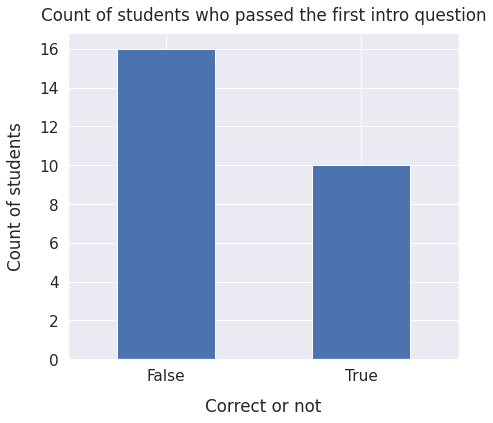

In [30]:
sns.set(font_scale=1.4)
df_final[df_final["Question"] == "Frequência Angular com Lissajous"]["Correct"].value_counts().plot(kind='bar', figsize=(7, 6), rot=0, stacked=True)
plt.xlabel("Correct or not", labelpad=14)
plt.ylabel("Count of students", labelpad=14)
plt.title("Count of students who passed the first intro question", y=1.02);


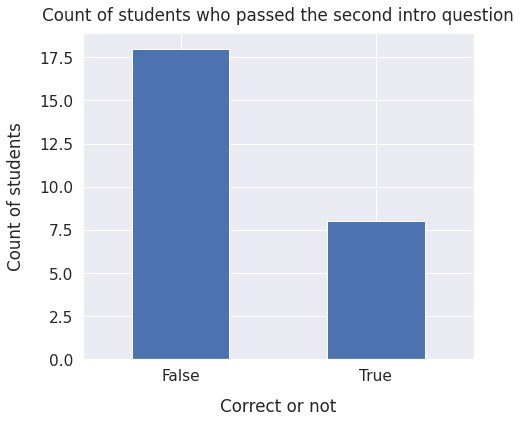

In [31]:
sns.set(font_scale=1.4)
df_final[df_final["Question"] == "Frequência angular com Lissajous 2"]["Correct"].value_counts().plot(kind='bar', figsize=(7, 6), rot=0, stacked=True)
plt.xlabel("Correct or not", labelpad=14)
plt.ylabel("Count of students", labelpad=14)
plt.title("Count of students who passed the second intro question", y=1.02);

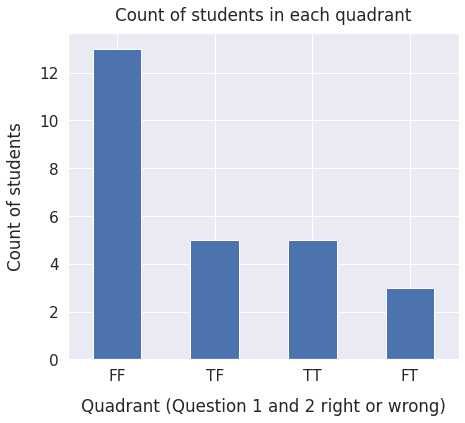

In [32]:
df_final[['student', 'quadrant']].drop_duplicates().reset_index().drop('index', axis=1)['quadrant'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0, stacked=True)
plt.xlabel("Quadrant (Question 1 and 2 right or wrong)", labelpad=14)
plt.ylabel("Count of students", labelpad=14)
plt.title("Count of students in each quadrant", y=1.02);

---
## Enhancement analysis

In [68]:
q1 = q1_q2_df.copy()[["Question", "Correct", "student"]]
q1 = q1[q1["Question"] == "Frequência Angular com Lissajous"].set_index("student")
q1.columns = ["Title", "Graduation"]
q1 = q1.add_suffix("_q1")

q2 = q1_q2_df.copy()[["Question", "Correct", "student"]]
q2 = q2[q2["Question"] == "Frequência angular com Lissajous 2"].set_index("student")
q2.columns = ["Title", "Graduation"]
q2 = q2.add_suffix("_q2")


In [70]:
q3 = q3_q4_q5_q6_df.copy()[["Title", "Graduation", "student"]]
q4 = q3_q4_q5_q6_df.copy()[["Title", "Graduation", "student"]]
q5 = q3_q4_q5_q6_df.copy()[["Title", "Graduation", "student"]]
q6 = q3_q4_q5_q6_df.copy()[["Title", "Graduation", "student"]]

q3["Graduation"] = q3["Graduation"].map({"Passed": True, "Failed": False})
q4["Graduation"] = q4["Graduation"].map({"Passed": True, "Failed": False})
q5["Graduation"] = q5["Graduation"].map({"Passed": True, "Failed": False})
q6["Graduation"] = q6["Graduation"].map({"Passed": True, "Failed": False})

q3 = q3[q3["Title"] == "Avaliação Final (Parte 1)"].set_index("student").add_suffix("_q3")
q4 = q4[q4["Title"] == "Avaliação Final (Parte 2)"].set_index("student").add_suffix("_q4")
q5 = q5[q5["Title"] == "Avaliação Final (Parte 3)"].set_index("student").add_suffix("_q5")
q6 = q6[q6["Title"] == "Avaliação Final (Parte 4)"].set_index("student").add_suffix("_q6")

df_enhancement_q2_q4_q6 = pd.concat([q2, q4, q6], axis=1, join="inner")[["Title_q2", "Title_q4", "Title_q6", "Graduation_q2", "Graduation_q4", "Graduation_q6"]]
df_enhancement_q1_q3_q5 = pd.concat([q1, q3, q5], axis=1, join="inner")[["Title_q1", "Title_q3", "Title_q5", "Graduation_q1", "Graduation_q3", "Graduation_q5"]]


In [77]:
def q3_q5_condition(s):
    if s["Graduation_q3"] == True or s["Graduation_q5"] == True:
        return True
    else:
        return False

df_enhancement_q1_q3_q5 = df_enhancement_q1_q3_q5[["Graduation_q1", "Graduation_q3", "Graduation_q5"]]
df_enhancement_q1_q3_q5["Enhancement"] = df_enhancement_q1_q3_q5.apply(q3_q5_condition, axis=1)
df_enhancement_q1_q3_q5

,Graduation_q1,Graduation_q3,Graduation_q5,Enhancement
student,,,,
felipehu,False,True,False,True
joaonado,True,True,True,True
daniel-saravali,True,True,False,True
renan,False,False,False,False
tonybai2003,False,False,False,False
matheus,True,False,False,False
lucasgiacone,True,True,True,True
terpomoj,True,False,False,False
rccampos,True,False,False,False


In [79]:
df_enhancement_q1_q3_q5.value_counts()

Graduation_q1  Graduation_q3  Graduation_q5  Enhancement
False          False          False          False          4
                              True           True           3
True           False          False          False          3
False          True           False          True           2
True           False          True           True           2
               True           True           True           2
False          True           True           True           1
True           True           False          True           1
dtype: int64

In [78]:
def q4_q6_condition(s):
    if s["Graduation_q4"] == True or s["Graduation_q6"] == True:
        return True
    else:
        return False

df_enhancement_q2_q4_q6 = df_enhancement_q2_q4_q6[["Graduation_q2", "Graduation_q4", "Graduation_q6"]]
df_enhancement_q2_q4_q6["Enhancement"] = df_enhancement_q2_q4_q6.apply(q4_q6_condition, axis=1)
df_enhancement_q2_q4_q6

,Graduation_q2,Graduation_q4,Graduation_q6,Enhancement
student,,,,
felipehu,False,False,False,False
joaonado,False,False,True,True
daniel-saravali,True,False,False,False
renan,False,True,False,True
tonybai2003,True,False,True,True
matheus,False,True,True,True
lucasgiacone,True,False,True,True
terpomoj,False,False,True,True
rccampos,False,False,True,True


In [80]:
df_enhancement_q2_q4_q6.value_counts()

Graduation_q2  Graduation_q4  Graduation_q6  Enhancement
False          False          False          False          5
                              True           True           5
True           False          True           True           5
False          True           False          True           1
                              True           True           1
True           False          False          False          1
dtype: int64